In [3]:
import pandas as pd
import numpy as np
import torch
import sys

sys.path.insert(0, '../../../src/')
from utils.script_utils import create_parser, create_data_
sys.path.insert(0, '../../../scripts/')
from softmargin_run_new import add_arg_parser

In [4]:
seeds = np.arange(0,10).tolist()
num_conf = [10]*len(seeds)
num_conf = dict(zip(range(len(num_conf)), num_conf))

parser = create_parser()
add_arg_parser(parser)
args = parser.parse_args("")
args.type_graph="RRG"

args.N = 100
args.d = 10
args.h = 3
args.t_limit = 15 # Numbers of epoch of our epidemics spreading [0,1,...,T_limit-1]
args.lambda_ = 0.04 # probability of infection
args.gamma = 2e-4 # probability of infection
args.mu = 0.02 # probability of recovery
args.small_lambda_limit=0
args.p_edge = 1
args.scale=2
args.a_min=0.01
args.a_max=0.3
args.a_step=0.01
args.path_contacts="i_bird_contacts.npz"
nsims=[1_000_000, 10_000_000, 100_000_000]
nsims_str = ["1_000_000", "10_000_000", "100_000_000"]
path_dir = "./data"
if path_dir == "not_setted":
    path_dir = type_graph

In [6]:
from epigen.epidemy_gen import epidemy_gen_new

list_contacts = {}
data_={}
INSTANCES = []
for i_seed, seed in enumerate(seeds):
    print(f"\nSEED: {seed}")
    
    args.seed=seed
    args.num_conf=num_conf[i_seed]
    #print(args)
    temp, name_file, INSTANCE = create_data_(args, give_instance=True)
    INSTANCES.append(INSTANCE)
    #Ns[cl] = int(max(temp["contacts"][:, 1]) + 1)
    list_contacts[seed] = temp["contacts"]
    data_[seed] = temp
N=args.N
data_.keys()


SEED: 0
nodes:100, edges:500
number of contacts: 15000
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 10,mean infected: 49.5, mean recover: 3.6, max num infected: 66
0 (0.00%) epidemies refused

S:45, I:50, R:5
S:48, I:47, R:5
S:88, I:12, R:0
S:34, I:61, R:5
S:47, I:48, R:5
S:45, I:49, R:6
S:49, I:48, R:3
S:54, I:44, R:2
S:53, I:45, R:2
S:42, I:55, R:3

SEED: 1
nodes:100, edges:500
number of contacts: 15000
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 10,mean infected: 51.2, mean recover: 5.0, max num infected: 90
0 (0.00%) epidemies refused

S:19, I:71, R:10
S:87, I:9, R:4
S:24, I:73, R:3
S:51, I:47, R:2
S:94, I:5, R:1
S:51, I:44, R:5
S:44, I:51, R:5
S:88, I:12, R:0
S:20, I:74, R:6
S:10, I:76, R:14

SEED: 2
nodes:100, edges:500
number of contacts: 15000
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 10,mean infected: 43.2, mean recover: 2.4, max num infected: 62
0 (0.00%) epidemies refused

S:58, I:40, R:2
S:38, I:58, R:4
S:42, I:54, 

../../../src/utils/script_utils.py:145: UserWarning: SAVING FOLDER DOES NOT EXIST
  warnings.warn("SAVING FOLDER DOES NOT EXIST")


number of contacts: 15000
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 10,mean infected: 42.3, mean recover: 3.6, max num infected: 62
0 (0.00%) epidemies refused

S:94, I:5, R:1
S:63, I:33, R:4
S:82, I:15, R:3
S:53, I:40, R:7
S:58, I:41, R:1
S:55, I:40, R:5
S:48, I:50, R:2
S:38, I:54, R:8
S:44, I:55, R:1
S:42, I:54, R:4

SEED: 4
nodes:100, edges:500
number of contacts: 15000
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 10,mean infected: 41.7, mean recover: 3.3, max num infected: 72
0 (0.00%) epidemies refused

S:71, I:28, R:1
S:66, I:31, R:3
S:68, I:30, R:2
S:46, I:53, R:1
S:63, I:34, R:3
S:40, I:51, R:9
S:70, I:28, R:2
S:80, I:20, R:0
S:28, I:66, R:6
S:51, I:43, R:6

SEED: 5
nodes:100, edges:500
number of contacts: 15000
Lim infected: 1, Lim max infected: 101
Num sources:  1
 # conf 10,mean infected: 45.6, mean recover: 3.3, max num infected: 78
0 (0.00%) epidemies refused

S:56, I:38, R:6
S:94, I:6, R:0
S:70, I:28, R:2
S:44, I:54, R:2
S:51, I:48, 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# READ DATA

create name_files

In [11]:
from epigen import EpInstance

In [19]:
INSTANCES = {s: EpInstance(type_graph=args.type_graph, d=args.d,
                           t_limit=args.t_limit,
                          n=N, lamda=args.lambda_, mu=args.mu,
                          p_edge=args.p_edge, n_source=args.n_sources,
                          seed=s)
            for s in seeds}

In [18]:
str(INSTANCES[0]), str(instances[0])

('RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_0_pe_1',
 'RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_0_pe_1')

In [20]:
name_files_nn = {}
Ns = [args.N]
args.d=10
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_nn[seed] = {}
    name_file_init = path_dir + "/ann/"
    #print(step, name_file_init)
    name_file_temp = name_file_init + \
        str(INSTANCES[seed])
    #    f"N_{N}_d_{args.d}_h_{args.h}_T_{args.t_limit}_lam_{args.lambda_}_mu_{args.mu}_p_edge_{args.p_edge}"
    #name_file_temp += f"_s_{seed}"
    name_files_nn[seed] = name_file_temp

name_files_sib = {}
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_sib[seed] = {}
    name_file_init = path_dir + "/sib/"
    #print(step, name_file_init)
    name_file_temp = name_file_init +\
        f"N_{N}_d_{args.d}_h_{args.h}_T_{args.t_limit}_lam_{args.lambda_}_mu_{args.mu}_p_edge_{args.p_edge}"
    name_file_temp += f"_s_{seed}"
    name_files_sib[seed] = name_file_temp
            #print(name_file_temp)
        
name_files_sm = {}
for i_sim, nsim in enumerate(nsims):
    name_files_sm[nsim]={}
    for i_seed, seed in enumerate(seeds):
        #print(f"\nSEED: {seed}")
        name_files_sm[nsim][seed] = {}
        name_file = path_dir + "/sm/" +str(INSTANCES[i_seed])
        name_file += f"_nc_{num_conf[seed]}"
        name_file+= f"_softm_nsims_{nsim}_rep_{args.n_iter-1}"
        #print(name_file)
        name_files_sm[nsim][seed] = name_file


In [21]:
name_files_nn

{0: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_0_pe_1',
 1: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_1_pe_1',
 2: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_2_pe_1',
 3: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_3_pe_1',
 4: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_4_pe_1',
 5: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_5_pe_1',
 6: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_6_pe_1',
 7: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_7_pe_1',
 8: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_8_pe_1',
 9: './data/ann/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_9_pe_1'}

### READ FILES

In [8]:
#create dictorary containing data
ress = {}
for i_seed, seed in enumerate(seeds):
    #print(f"SEED: {seed}")
    ress[seed] = {}
    ress[seed] = []
    for instance_num in range(num_conf[i_seed]):
        #print(f" N: {N_cl} instance {instance_num}")
        ress[seed].append({})


In [22]:
for i_seed, seed in enumerate(seeds):
    print(f" {seed}", end="")
    for instance_num in range(num_conf[i_seed]):
        ress[seed][instance_num]["regressive"] = {}
        #print(f"Read instance {instance_num}")
        name_temp = name_files_nn[seed] +"_" + str(instance_num)
        try:
            ress[seed][instance_num]["regressive"] = {}
            ress[seed][instance_num]["regressive"]["marginals"] = np.load(name_temp + "_margs.npz",
                                                                    "r+",
                                                                   allow_pickle=True,
                                                                   fix_imports=True)["marginals"]
        except:
            print(f"  instance_num: {instance_num} NOT FOUND")
        try:
            ress[seed][instance_num]["regressive"]["run"] = pd.read_csv(name_temp + ".gz")
            beta = ress[seed][instance_num]["regressive"]["run"]["beta"].iloc[-1]
            if beta < 1:
                print(f"***** beta {beta} {seed}")
            #print(f"  instance_num: {instance_num}")
        except:
            print("no gz")
        try:
            '''ress[seed][N_cl][instance_num]["regressive"]["net"] = torch.load(name_temp + ".pt",
                                                                  map_location=device)
            #ress[N_cl][instance_num]["regressive"]["net"].to(device)
            ress[seed][N_cl][instance_num]["regressive"]["net"].device = device
            for ll in ress[seed][N_cl][instance_num]["regressive"]["net"].sublayers:
                for l in ll:
                    l.device=device
            print(f"  NN net: {instance_num}")'''
            pass
        except:
            print(f"  NN net: {instance_num} NON FOUND")

 0 1 2 3 4 5 6 7 8 9

In [23]:
for i_seed, seed in enumerate(seeds):
    print(f" {seed}", end="")
    for instance_num in range(num_conf[i_seed]):
        #print(f"Read instance {instance_num}")
        name_temp = name_files_sib[seed] +"_" + str(instance_num)
        ress[seed][instance_num]["sib"] = {}
        try:
            ress[seed][instance_num]["sib"]["marginals"] = np.load(name_temp + "_sib_margs.npz",
                                                                    "r+",
                                                                   allow_pickle=True,
                                                                   fix_imports=True)["marginals"]
            #print("load SIB")
        except:
            print(f"SIB not found")


 0 1 2 3 4 5 6 7 8 9

In [24]:
for i_seed, seed in enumerate(seeds):
    print(f" {seed}", end="")
    for instance_num in range(num_conf[i_seed]):
        ress[seed][instance_num]["sm"] = {}
        for nsim in nsims:
            ress[seed][instance_num]["sm"][nsim] = {}
            #print(f"Read instance {instance_num}, nsim: {nsim}")
            #for nsim in nsims:
            name_temp_sm = name_files_sm[nsim][seed]
            try:
                    #ress[seed][N_cl][instance_num]["sm"][nsim] = {}
                '''ress[seed][N_cl][instance_num]["sm"][nsim]["marginals"] = np.load(name_temp_sm + "_margs.npz",
                                                                                "r+",
                                                                               allow_pickle=True,
                                                                               fix_imports=True)["margs_0"]'''
                ress[seed][instance_num]["sm"][nsim]["prob_zero"] = np.load(name_temp_sm + "_probs.npz",
                                                                                "r+",
                                                                               allow_pickle=True,
                                                                               fix_imports=True)["inst_" + str(instance_num)]
                #print(f"loaded SF nsim: {instance_num} ...")
            except:
                print(f"not found SF nsim: {instance_num} {nsim}... ")

                    #ress[instance_num]["regressive"]["net"] = torch.load(name_temp + ".pt")                          name_temp = name_files_nn[seed][N_cl][step] +"_" + str(instance_num)


 0 1 2 3 4 5 6 7 8 9

In [9]:
name_temp_sm

'./data/sm/RRG_n_100_d_10_tlim_15_lam_0.04_mu_0.02_s_9_pe_1_nc_10_softm_nsims_100000000_rep_0'

# results

In [43]:
from importlib import reload

In [28]:
from utils.common import sort_by_inf

In [30]:
from utils.common import sort_by_inf as sort_I
from analysis.results_analysis import sources_finder, plot_patient_zero_roc

In [50]:
import analysis.results_analysis
reload(analysis.results_analysis)
from analysis.results_analysis import sources_finder, plot_patient_zero_roc

In [45]:
marginals, pos_sources = sources_finder(ress, data_, num_conf, nsims)

In [53]:
import pickle
with open("pos_sources.pkl", "wb") as f:
    pickle.dump( pos_sources, f )

In [55]:
pos_sources["sm"]

[{1000000: array([50, 52, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23, 24, 25, 25, 24, 24,
         24, 24, 24, 24, 23, 24, 24, 25, 25, 27, 27, 27, 26]),
  10000000: array([50,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  9, 10,
         13, 16, 17, 16, 17, 18, 17, 17, 17, 18, 18, 19, 20]),
  100000000: array([50, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 17, 16, 16, 13, 15,
         14, 15, 15, 17, 17, 17, 17, 17, 17, 17, 18, 18, 20])},
 {1000000: array([73, 74, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13,  9,  7,
          6,  5,  4,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1]),
  10000000: array([73,  5,  5,  5,  5,  5,  5,  6,  7,  7,  7,  7,  7,  7,  5,  4,  3,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1]),
  100000000: array([73,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
          2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1])},
 {1000000: array([79,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,
          6,

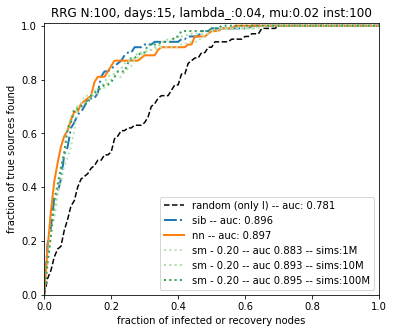

In [52]:
import matplotlib.pyplot as plt
bins=N
plot_patient_zero_roc(plt,
                          pos_sources, 
                          nsims, 
                      args,
                          alpha=19, 
                          bins=bins,
                          range_=(0,1),
                          norm=N,
                          colors=plt.get_cmap("Greens"),
                     figargs=dict(figsize=(6,5)))
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{100}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)
plt.show()

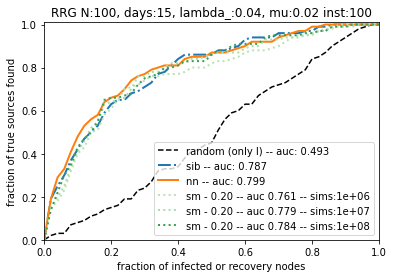

In [40]:
import matplotlib.pyplot as plt
bins=50
plot_patient_zero_roc(plt,
                          pos_sources, 
                          nsims, 
                          args,
                          alpha=19, 
                          bins=bins,
                          range_=(0,1),
                          norm=pos_sources["Is_len"],
                          colors=plt.get_cmap("Greensfigargs=
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{100}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)
plt.show()

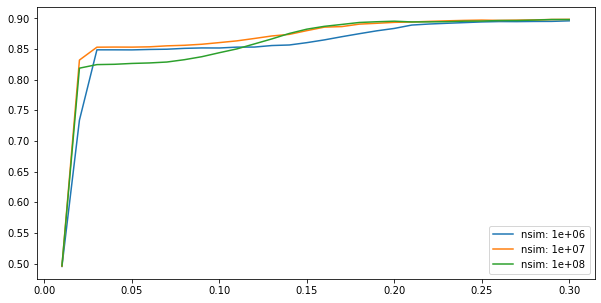

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
norm=N
bins=N
range_=(0,1)
for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(pos_sources["sm"][0][nsim])):
        pos_source_sm=np.array([pos_sources["sm"][ii][nsim][alpha] for ii in range(len(pos_sources["sm"]))])
        s_sm,x = np.histogram(pos_source_sm/norm, bins=bins, range=range_)
        y_sm = np.insert(np.cumsum(s_sm)/len(pos_sources["sm"]),0,0)        
        #print(alpha, np.cumsum(s_sm))
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)

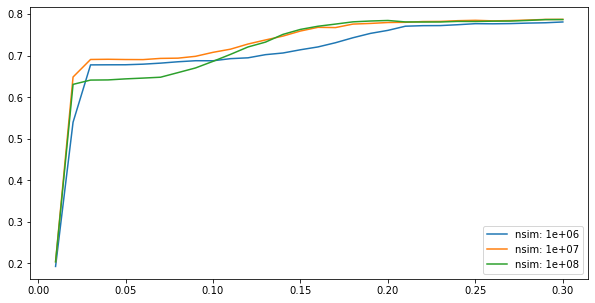

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
norm=pos_sources["Is_len"]
bins=100
range_=(0,1)
for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(pos_sources["sm"][0][nsim])):
        pos_source_sm=np.array([pos_sources["sm"][ii][nsim][alpha] for ii in range(len(pos_sources["sm"]))])
        s_sm,x = np.histogram(pos_source_sm/norm, bins=bins, range=range_)
        y_sm = np.insert(np.cumsum(s_sm)/len(pos_sources["sm"]),0,0)        
        #print(alpha, np.cumsum(s_sm))
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)